# Burlington (Ontario) in a changing climate

In [1]:
# import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Download Climate Data

In [11]:
burlington_ncei_url = ('https://www.ncei.noaa.gov/access/services/data/v1'
                    '?dataset=daily-summaries&dataTypes=TAVG&'
                    'stations=CA006151061&startDate=2015-04-01&'
                    'endDate=2024-04-28&units=standard')
burlington_ncei_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TAVG&stations=CA006151061&startDate=2015-04-01&endDate=2024-04-28&units=standard'

In [18]:
# Download the climate data
burlington_climate_df = pd.read_csv(
    burlington_ncei_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Check that the download worked
burlington_climate_df.head()

# rename temperature column from TANG (average temperature) 
# to TEMP_F (temperature in Fahrenheit)
burlington_climate_units_df = burlington_climate_df.rename(columns={
    'TAVG': 'TEMP_F',                                                   # TEMP_F for temperature in Fahrenheit.
})

### Conversion Fahrenheit to Celcius 

<Axes: xlabel='DATE'>

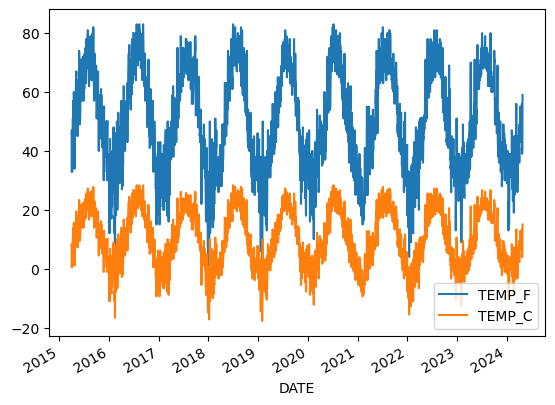

In [19]:
# Convert units with a function
def Fahrenheit_to_Celcius(temperature_F: float):
    """Convert Fahrenheit temperature to Celcius

    :param temperature_F (float): Temperature in Fahrenheit
    """
    return (temperature_F-32) * 5/9 

# execute function
burlington_climate_units_df['TEMP_C'] = (
    burlington_climate_units_df['TEMP_F'].apply(Fahrenheit_to_Celcius))

burlington_climate_units_df.plot()